# Gini Visualisations

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
ineq = pd.read_csv('gini_17.11.csv')

In [94]:
ineq.rename(columns={'GDP per capita (current US$) - NY.GDP.PCAP.CD':'gdp_pc','World Regions (UN SDG Definition)':'world_regions'
             ,'Regime Type (RoW Measure Definition)':'regime_type','Population, total - SP.POP.TOTL':'total_population'
            ,'Access to electricity (% of population) - EG.ELC.ACCS.ZS':'access_elec_percent','GDP (current US$) - NY.GDP.MKTP.CD':'gdp'
            ,'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX':'wbl_index_score'
             ,'Income Classification (World Bank Definition)':'income_classification'},errors='raise',inplace=True)

In [95]:
ineq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 25 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Unnamed: 0                                                                           3287 non-null   int64  
 1   Unnamed: 0.1                                                                         3287 non-null   int64  
 2   country                                                                              3287 non-null   object 
 3   Country Code                                                                         3287 non-null   object 
 4   year                                                                                 3287 non-null   int64  
 5   Continent                                                                            3285 

# Countries with the most data per Continent
## Africa
### Uganda (11), South Africa (11), Rwanda (10), Zambia (8), Ethiopia (7), Malawi (7)
## Asia
### Armenia (19), China (18), Thailand (17), Indonesia (19),  Kyrgyz Republic (19)
## Europe
### Pretty much any have 19
## North America
### Dominican Republic (19), El Salvador (19), Jamaica (17), United States (19), Costa Rica (19)
## Oceania
### New Zealand (16), Australia (12), compare to Fiji (6) or Tonga (4)?
## South America
### Peru (19), Argentina (19), Uruguay (19), Ecuador (19), Colombia (19)

# Change over time in these selected African countries

In [97]:
ineq_africa = ineq[ineq['country'].isin(['Uganda', 'South Africa', 'Rwanda', 'Zambia', 'Ethiopia', 'Malawi'])]

<AxesSubplot:xlabel='year', ylabel='new_gini'>

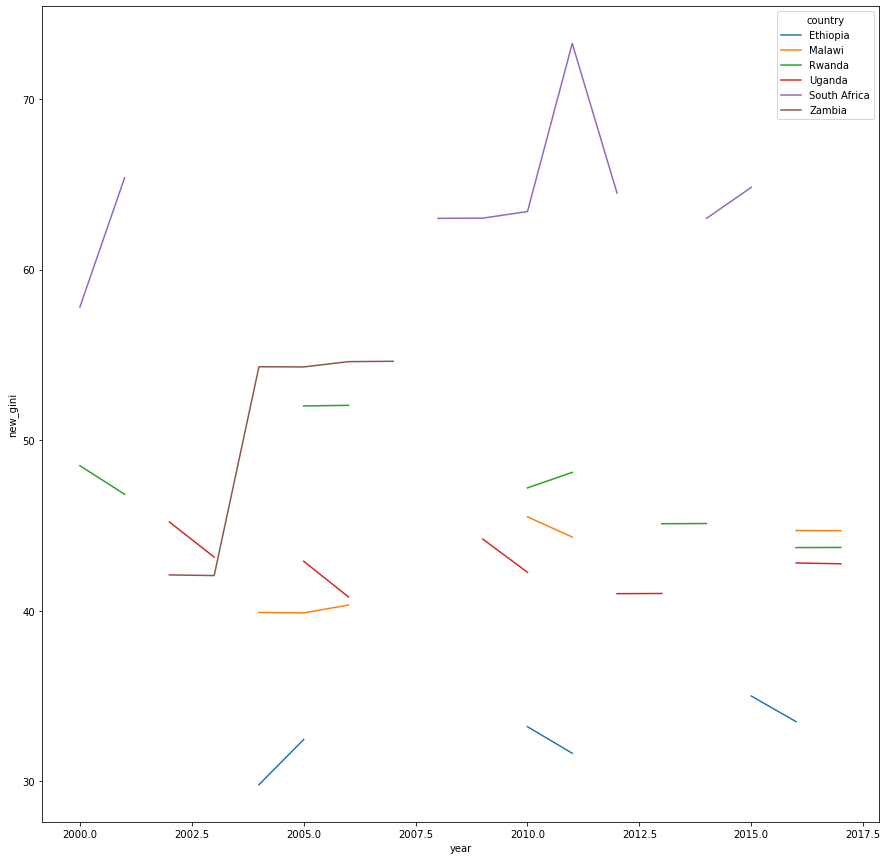

In [98]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq_africa, x="year", y="new_gini", hue="country")

# Change over time in these selected Asian countries

In [99]:
ineq_asia = ineq[ineq['country'].isin(['Armenia', 'China', 'Thailand', 'Indonesia', 'Kyrgyz Republic'])]

<AxesSubplot:xlabel='year', ylabel='new_gini'>

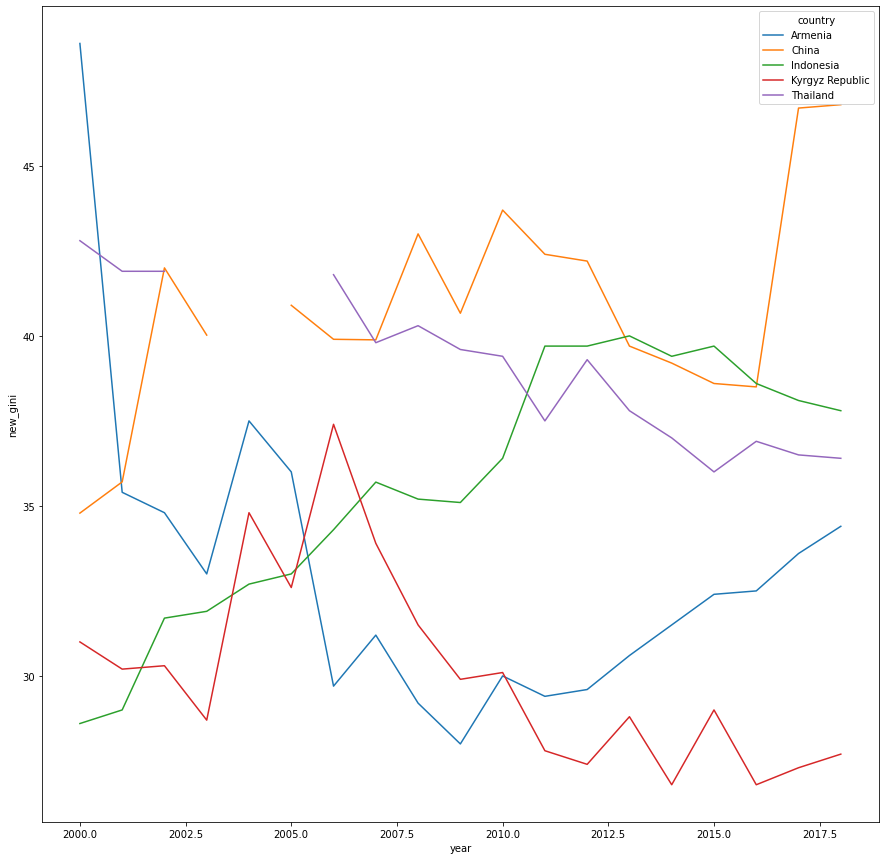

In [100]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq_asia, x="year", y="new_gini", hue="country")

# Change over time in these selected North American countries

In [101]:
ineq_na = ineq[ineq['country'].isin(['Dominican Republic', 'El Salvador', 'Jamaica', 'United States', 'Costa Rica'])]

<AxesSubplot:xlabel='year', ylabel='new_gini'>

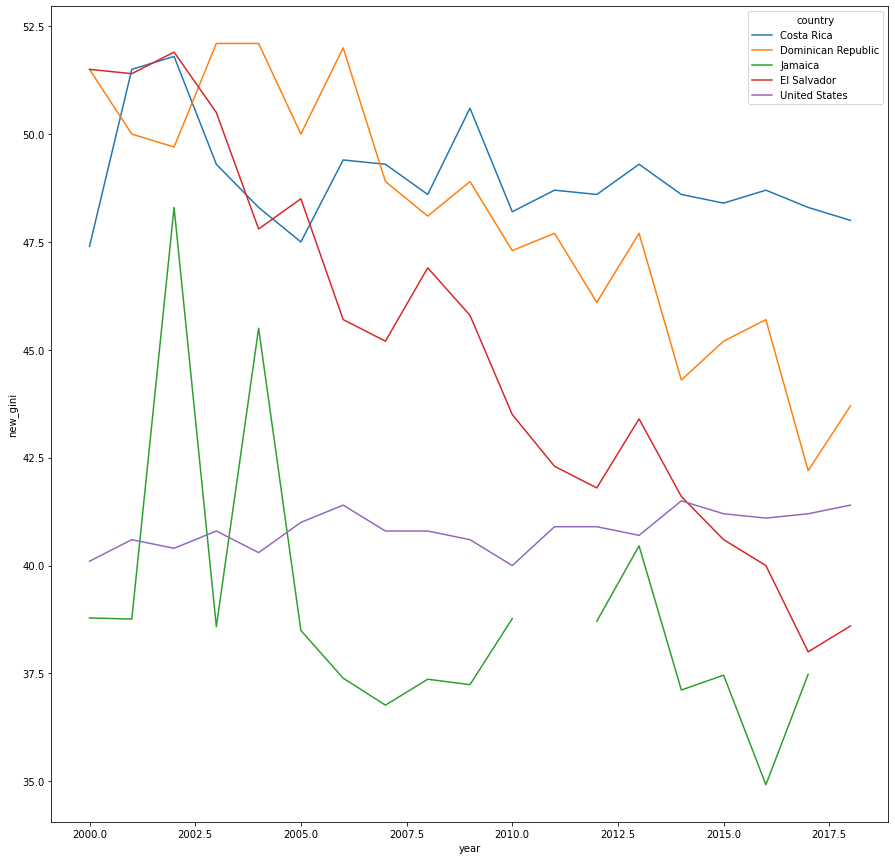

In [102]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq_na, x="year", y="new_gini", hue="country")

# Change over time in these selected South Amrican countries

In [103]:
ineq_sa = ineq[ineq['country'].isin(['Peru', 'Argentina', 'Uruguay', 'Ecuador', 'Colombia'])]

<AxesSubplot:xlabel='year', ylabel='new_gini'>

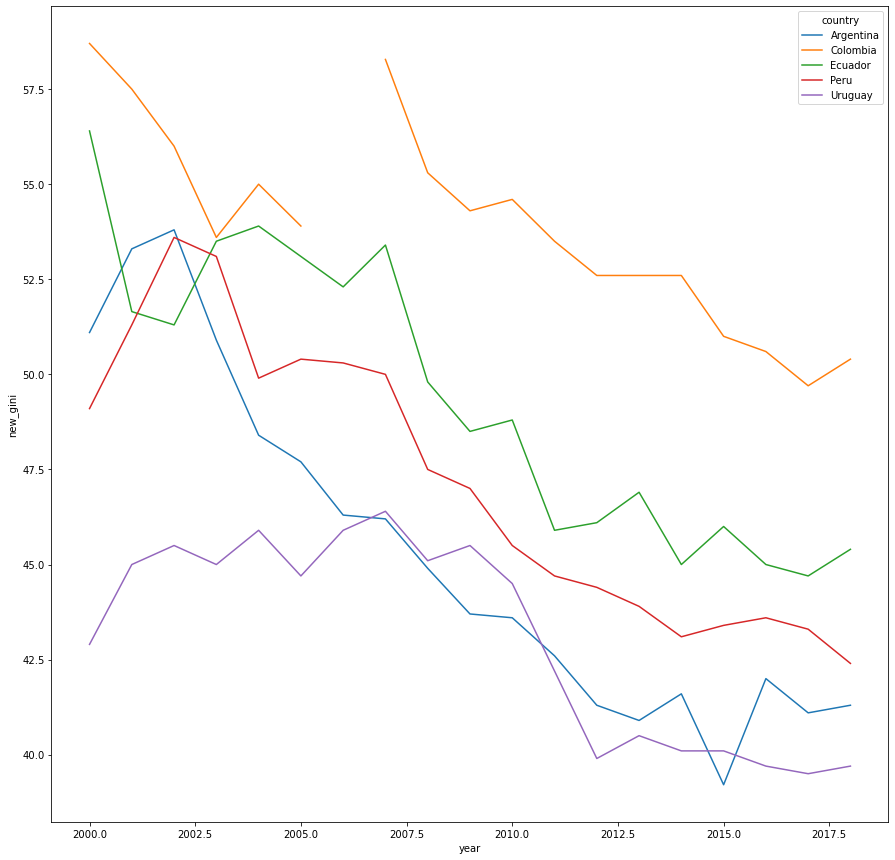

In [104]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq_sa, x="year", y="new_gini", hue="country")

# Change over time in these selected Oceania countries

In [105]:
ineq_oc = ineq[ineq['country'].isin(['New Zealand', 'Australia', 'Fiji', 'Tonga'])]

<AxesSubplot:xlabel='year', ylabel='new_gini'>

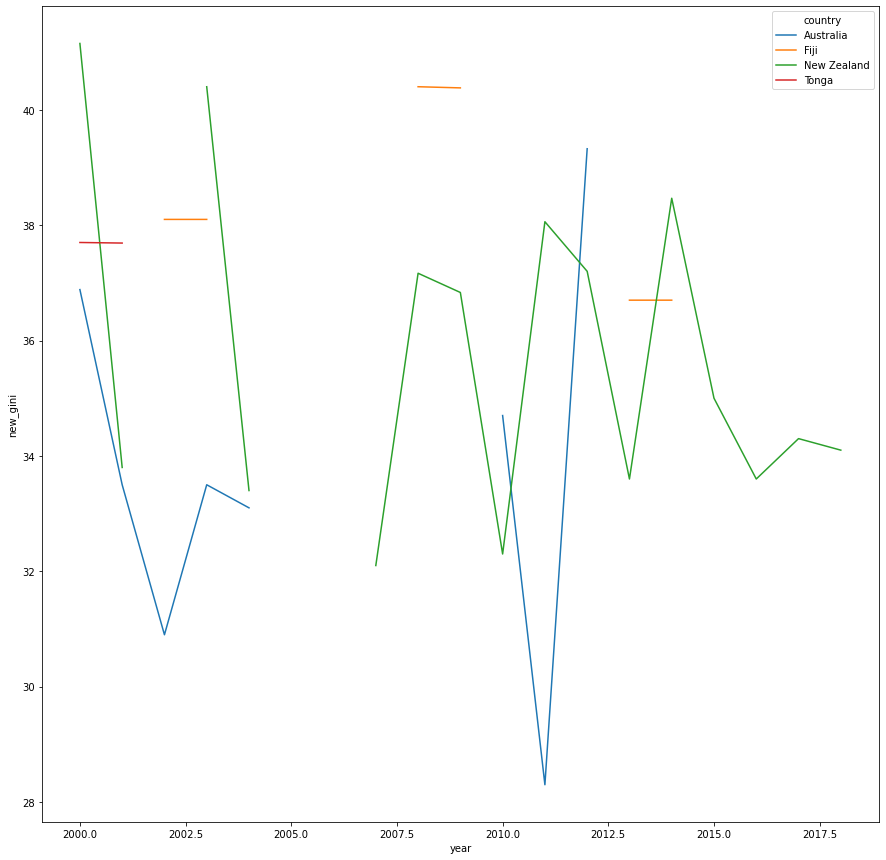

In [106]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq_oc, x="year", y="new_gini", hue="country")

# Overall view of Gini wrt different measures

## Gini over time for each continient

<AxesSubplot:xlabel='year', ylabel='new_gini'>

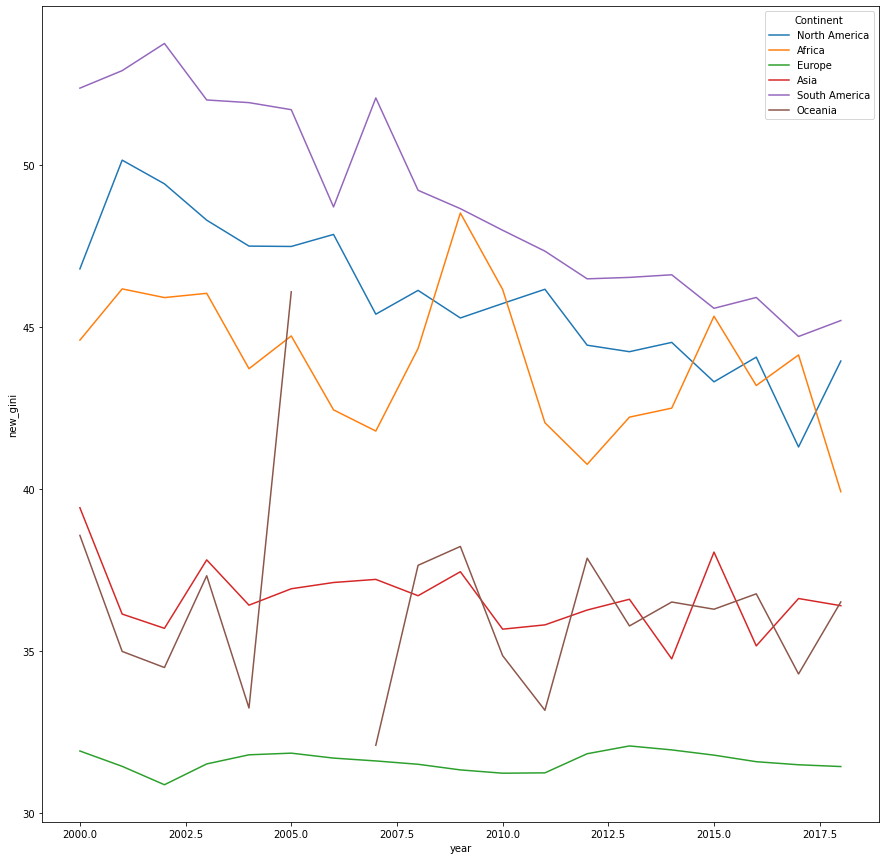

In [107]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq, x="year", y="new_gini", hue="Continent")

## Gini over time for Regime Type

<AxesSubplot:xlabel='year', ylabel='new_gini'>

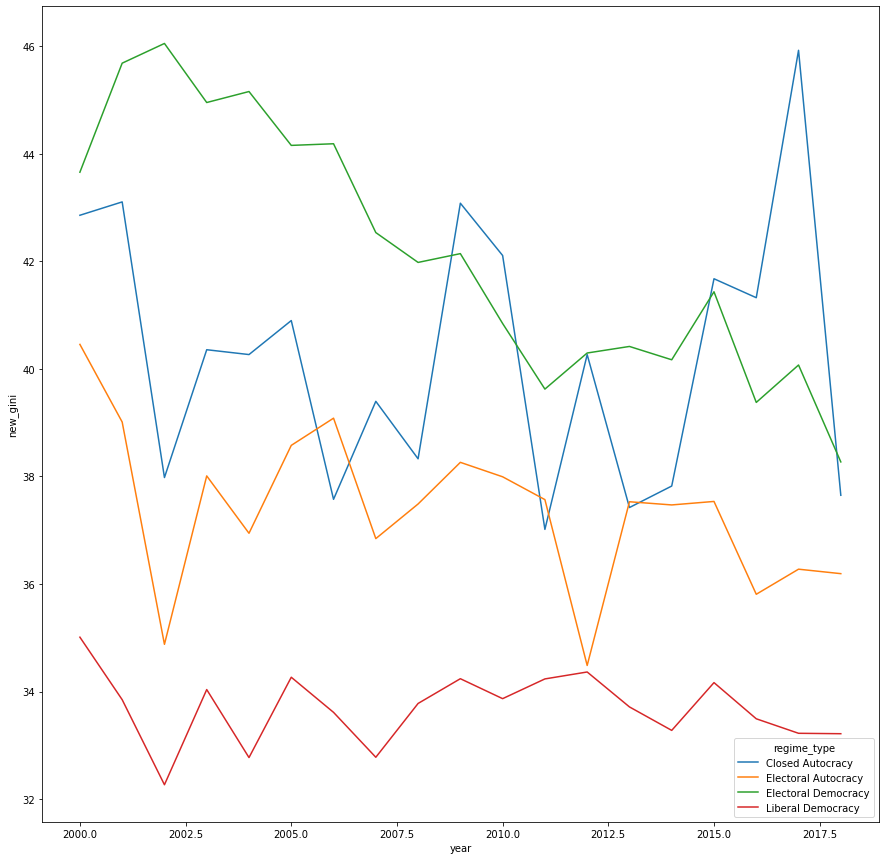

In [108]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq, x="year", y="new_gini", hue="regime_type")

## Gini over time for Income Classification

<AxesSubplot:xlabel='year', ylabel='new_gini'>

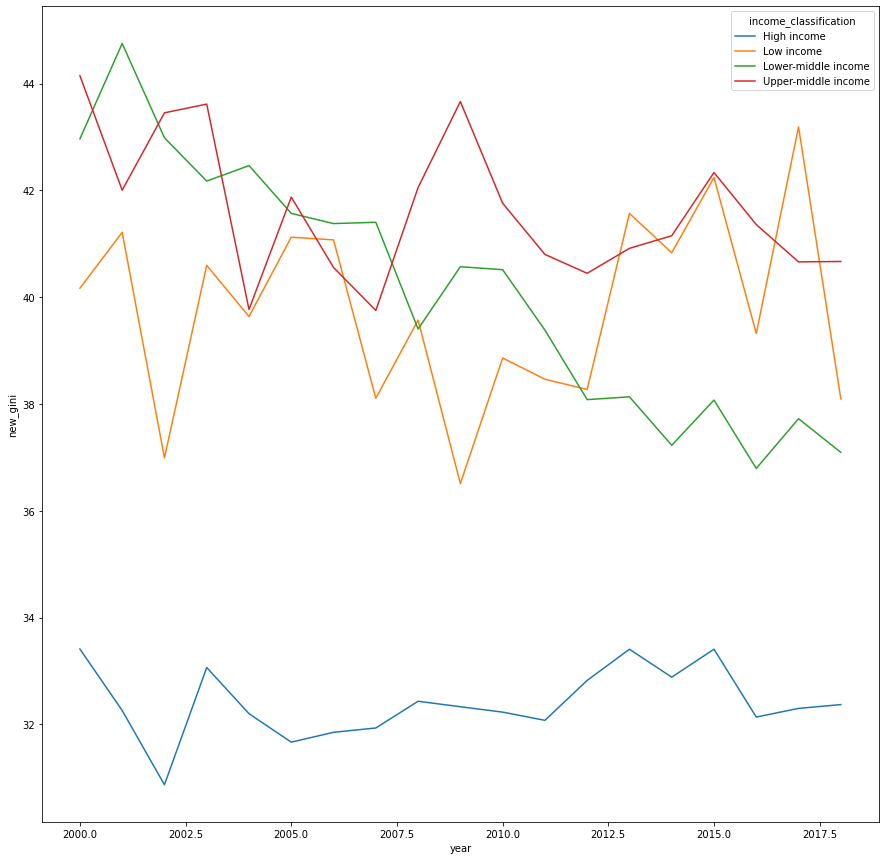

In [109]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.lineplot(data=ineq, x="year", y="new_gini", hue="income_classification")

# Relationship between the countries that have nulls and certain metrics

## Finding the number and percentage nulls per continent in a very roundabout way

In [110]:
gini_nulls = ineq[ineq['new_gini'].isnull()].groupby(['Continent'])['country'].count().reset_index()

In [111]:
ineq[ineq['new_gini'].isnull()].groupby(['Continent'])['country'].count()

Continent
Africa           678
Asia             518
Europe            58
North America    234
Oceania           72
South America     63
Name: country, dtype: int64

In [112]:
gini_total = ineq.groupby(['Continent'])['country'].count().reset_index()

In [113]:
gini_nonnulls = ineq[ineq['new_gini'].notnull()].groupby(['Continent'])['country'].count().reset_index()

In [114]:
gini_stats = pd.merge(pd.merge(gini_nulls,gini_total,on='Continent'),gini_nonnulls,on='Continent')

In [115]:
gini_stats

,Continent,country_x,country_y,country
0,Africa,678,893,215
1,Asia,518,872,354
2,Europe,58,760,702
3,North America,234,418,184
4,Oceania,72,114,42
5,South America,63,228,165


In [116]:
gini_stats['percentage_nulls'] = 100*gini_stats['country_x']/gini_stats['country_y']

## Nulls per continent stats, visualised

In [117]:
gini_stats

,Continent,country_x,country_y,country,percentage_nulls
0,Africa,678,893,215,75.923852
1,Asia,518,872,354,59.403670
2,Europe,58,760,702,7.631579
3,North America,234,418,184,55.980861
4,Oceania,72,114,42,63.157895
5,South America,63,228,165,27.631579


<AxesSubplot:xlabel='Continent', ylabel='percentage_nulls'>

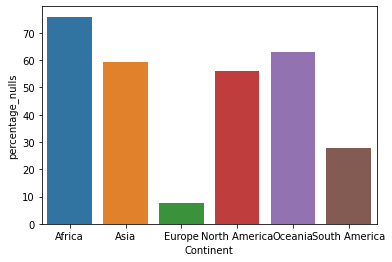

In [118]:
sns.barplot(x="Continent", y="percentage_nulls", data=gini_stats)

# Relationships between countries with and without nulls, with other measures linked to inequality

## Are we missing data from certain types of country in particular?

## 1. Income Classification

In [149]:
has_gini = ineq[ineq['new_gini'].notnull()]

In [150]:
no_gini = ineq[ineq['new_gini'].isnull()]

### Has Gini Values

<AxesSubplot:ylabel='income_classification'>

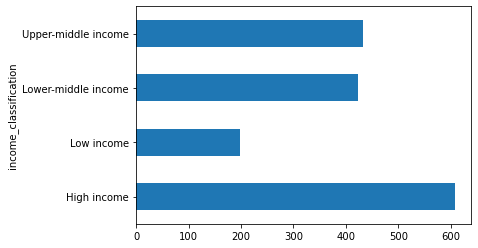

In [151]:
has_gini.groupby('income_classification')['country'].count().plot.barh()

### Has No Gini Values

<AxesSubplot:ylabel='income_classification'>

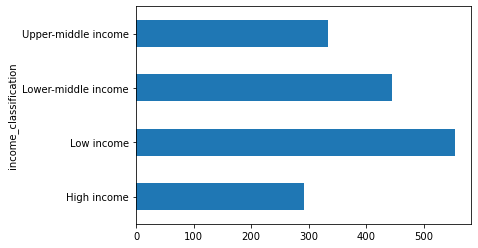

In [152]:
no_gini.groupby('income_classification')['country'].count().plot.barh()

## Regime Type

### Has Gini Values

<AxesSubplot:ylabel='regime_type'>

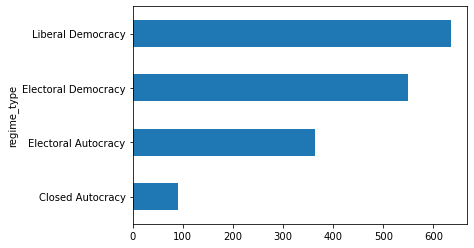

In [153]:
has_gini.groupby('regime_type')['country'].count().plot.barh()

### Has No Gini Values

<AxesSubplot:ylabel='regime_type'>

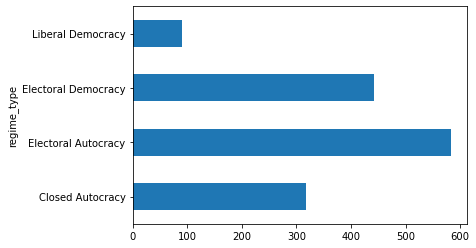

In [154]:
no_gini.groupby('regime_type')['country'].count().plot.barh()

## Power

### Has Gini Values

<AxesSubplot:xlabel='power_soec', ylabel='Count'>

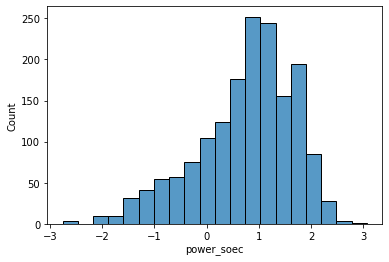

In [162]:
sns.histplot(data=has_gini, x="power_soec", bins=20)

### Has No Gini Values

<AxesSubplot:xlabel='power_soec', ylabel='Count'>

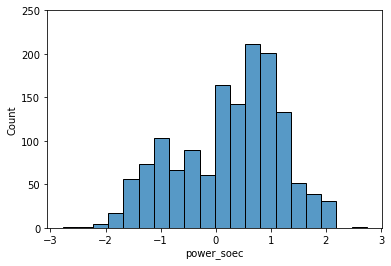

In [161]:
plt.ylim(0, 250)
sns.histplot(data=no_gini, x="power_soec", bins=20)

## GDP per capita

### Has Gini Values

<AxesSubplot:xlabel='gdp_pc', ylabel='Count'>

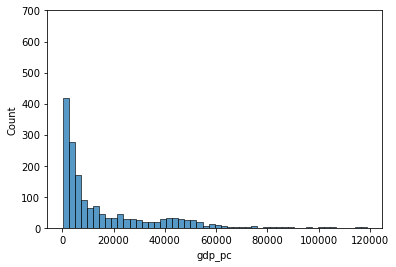

In [160]:
plt.ylim(0, 700)
sns.histplot(data=has_gini, x="gdp_pc", bins=50)

### Has No Gini Values

<AxesSubplot:xlabel='gdp_pc', ylabel='Count'>

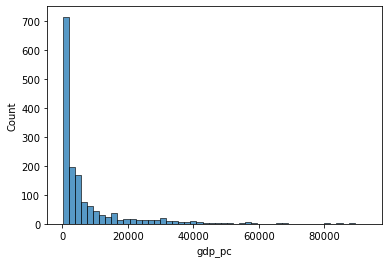

In [159]:
sns.histplot(data=no_gini, x="gdp_pc",bins=50)